In [32]:
import os
from array import array
import numpy as np
from commpy.filters import rcosfilter
from commpy.filters import rrcosfilter
import matplotlib
import matplotlib.pyplot as plt
import ipympl
#%matplotlib inline
%matplotlib widget

In [33]:
def calculate_spectrum(signal):
    yf = np.fft.fft(signal)
    yf = np.abs(yf.reshape((len(yf), 1))) / len(signal)
    return yf


def plot_spectrum(signal, figure_counter, title="Amplitude spectrum"):
    spectrum = np.roll(calculate_spectrum(signal), len(signal) // 2)
    yf = 20 * np.log10(spectrum)

    plt.figure(figure_counter)
    plt.cla()
    x_data = np.arange(-len(spectrum) // 2 + 1, len(spectrum) // 2 + 1)
    x_data = x_data / (len(spectrum) / 2)
    plt.plot(x_data, yf)
    plt.grid(1)
    plt.xlabel('Frequency (semicircles)')
    plt.ylabel('Magnitude (dB)')
    plt.title(title)
    plt.show()
    return yf

def plot_signal_power(signal, figure_counter, title="Signal Power"):
    plt.figure(figure_counter)
    plt.cla()
    x_data = np.arange(0, len(signal))
    plt.plot(x_dasta, signal)
    plt.grid(1)
    plt.xlabel('time (samples)')
    plt.ylabel('Signal Power')
    plt.title(title)
    plt.show()


def add_freq(sig, f0_to_fsig):
    n = np.arange(0, len(sig), 1)
    mixer = np.exp(1j * np.pi * f0_to_fsig * n)
    print(mixer[(821500 - 10 -1) : (821500 - 1)])
    return sig * mixer

In [34]:
def read_signal(file_name, data_type, int_num_to_read = 0):
    file_stats = os.stat(file_name)
    file_size = file_stats.st_size
    iq_size_in_bytes = 0
    if data_type == 'H':
        iq_size_in_bytes = 4
    if data_type == 'f':
        iq_size_in_bytes = 8
    if int_num_to_read == 0:
        int_num_to_read = file_size // iq_size_in_bytes * 2
    else:
        int_num_to_read += (int_num_to_read % 2)
    print(int_num_to_read)     
    arr = array(data_type)
    with open(file_name, 'rb') as fileobj:
        arr.fromfile(fileobj, int_num_to_read)
        dd = struct.unpack('>f', arr)[0]
    i = np.array(arr[:: 2])
    i = i.reshape((len(i), 1))
    q = np.array(arr[1:: 2])
    q = q.reshape((len(q), 1))
    print(i[:10])
    sig = np.empty((len(i), 1), complex)
    sig.real = i
    sig.imag = q
    sig_flatten = sig.flatten()
    return sig_flatten

In [35]:
#read_signal("/home/xy/projects/cpp/int2float/cmake-build-debug-gcc_13/float_mxdma_hrc.pcm", 'H', 6)

In [36]:
file_path = "/home/xy/projects/cuda/GPU_Overlap-and-save_convolution/GPU_OLS_C2C_sharedmemory/out.dat" #"/home/xy/Signals/MxDMA/HRC/sig_1264460229_16437329_2024-06-14_14-48-43.pcm"
data_type = 'f'
figure_counter = 0
start_pos = 0 # 75177 # [IQ-samples]
used_len = 16430 #16437329 # [IQ-samples]
iq_parts = (start_pos + used_len) * 2
#source_signal_full = read_signal(file_path, data_type, iq_parts)
#print(len(source_signal_full))

In [37]:
#plot_signal_power(source_signal_full, 2)
#plot_spectrum(source_signal_full, 1)

In [38]:
import numpy as np
import struct
import os
def read_by_unpack(file_name, data_num=0):
    # Load test data
    
    f = open(file_name,'rb')
    file_stats = os.stat(file_name)
    file_size = file_stats.st_size
    print(file_size)
    if data_num == 0:
        data_num = int(file_size / 4);
    print("data num ")
    print(data_num)
    #  102500 is the number of numbers contained in the document, and a floating point number occupies 4 bytes
    arr = f.read(data_num * 4)
    data_raw = struct.unpack('f'*data_num, arr)
    f.close()
    return data_raw
    
import numpy as np

def read_float_by_unpack_delimeter(file_name, data_num=0):
    # Load test data
    
    #f = open(file_name,'rb')
    file_stats = os.stat(file_name)
    file_size = file_stats.st_size
    #print(file_size)
    if data_num == 0:
        data_num = int(file_size / 4);


    # Open the binary file using a file object
    with open(file_name, 'rb') as file:
    # Read the binary data and convert it to a NumPy array
        data = np.fromfile(file, dtype=np.float32, sep='\n')

    #with open(file_name, 'rb') as f:
     #   for line in f.readlines():
            # Each line represents a binary float, strip the newline and unpack
      #      number = struct.unpack('f', line.strip())[0]
       #     data_raw[i] = number
    
    #print("data num ")
    #print(data_num)
    #  102500 is the number of numbers contained in the document, and a floating point number occupies 4 bytes
    #arr = f.read(data_num * 4)
    #data_raw = struct.unpack('f'*data_num, arr)
    
    return data
    
def make_cmplx_sig(iq_data):
    i = np.array(iq_data[:: 2])
    i = i.reshape((len(i), 1))
    q = np.array(iq_data[1:: 2])
    q = q.reshape((len(q), 1))
    print(i[:10])
    sig = np.empty((len(i), 1), complex)
    sig.real = i
    sig.imag = q
    sig_flatten = sig.flatten()
    return sig_flatten


In [39]:
file_rrc_filt = '/home/xy/projects/cuda/GPU_Overlap-and-save_convolution/GPU_OLS_C2C_sharedmemory/mxdma_mixed_sig.dat'
file_rrc_filt = '/home/xy/projects/cuda/GPU_Overlap-and-save_convolution/GPU_OLS_C2C_sharedmemory/filter_rrc.dat'
file_rrc_filt = '/home/xy/projects/cuda/GPU_Overlap-and-save_convolution/GPU_OLS_C2C_sharedmemory/rrc_filtered.dat'
#file_rrc_filt = '/home/xy/projects/cuda/GPU_Overlap-and-save_convolution/GPU_OLS_C2C_sharedmemory/h_filter.dat'
#file_rrc_filt = '/home/xy/projects/cuda/GPU_Overlap-and-save_convolution/GPU_OLS_C2C_sharedmemory/h_input_signal.dat'

filt_sig = read_float_by_unpack_delimeter(file_rrc_filt)
print(len(filt_sig))
shift = 10000
start = 0#(len(filt_sig) - 100 - shift)
end   = 100#len(filt_sig) - shift
#print(filt_sig[start : end])
cmplx_sig = make_cmplx_sig(filt_sig)
print(cmplx_sig[:30])
print(len(cmplx_sig))

3277568
[[170.835  ]
 [110.551  ]
 [ 50.1133 ]
 [  5.39303]
 [-10.6171 ]
 [ 11.5888 ]
 [ 70.8705 ]
 [161.95   ]
 [280.863  ]
 [413.311  ]]
[ 170.83500671 +940.39599609j  110.5510025 +1147.93994141j
   50.11330032+1262.02001953j    5.39303017+1274.7800293j
  -10.61709976+1191.89001465j   11.58880043+1040.06994629j
   70.87049866 +864.12799072j  161.94999695 +708.40997314j
  280.86300659 +614.49102783j  413.31100464 +608.67498779j
  544.63397217 +698.89001465j  658.2869873  +878.47497559j
  745.98101807+1124.39001465j  798.78900146+1386.69995117j
  815.11798096+1610.39001465j  799.32000732+1749.63000488j
  758.48498535+1777.19995117j  705.89697266+1683.36999512j
  651.56097412+1485.55004883j  594.29998779+1223.57995605j
  527.42401123 +952.47302246j  446.56500244 +721.68103027j
  340.13900757 +566.60601807j  203.55999756 +505.81399536j
   36.72890091 +521.25500488j -143.43299866 +574.4710083j
 -324.03799438 +614.80401611j -471.75799561 +598.5j
 -562.66400146 +495.63598633j -573.46002197 

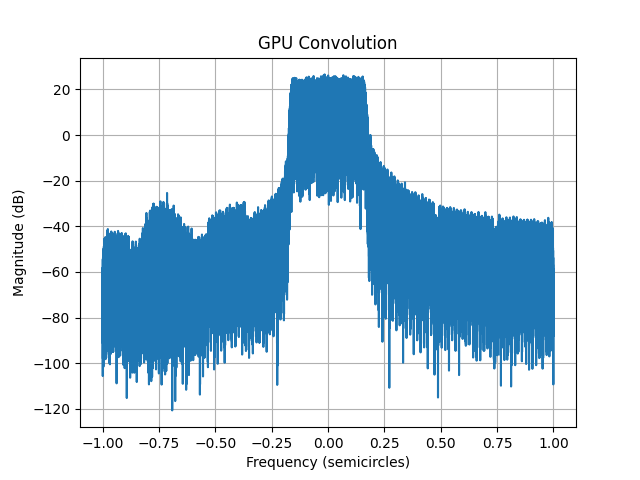

array([[-70.2277127 ],
       [-71.32107448],
       [-71.20060672],
       ...,
       [-71.40777528],
       [-71.1385239 ],
       [-69.5413615 ]])

In [40]:
plot_spectrum(cmplx_sig, 2, title="GPU Convolution")

In [41]:
import gc

#del data_raw
#del arr
#gc.collect()